In [3]:
from ultralytics import YOLO
import os

model = "/home/jcaldeira/dressing_virtuel_data_collector/kaggle/working/runs/detect/train/weights/best.pt"

# Load the trained model
model = YOLO(model)

In [11]:
predict_img = '/home/jcaldeira/dressing_virtuel_data_collector/media/tmp/detection/100_0144.JPG'
results = model.predict(source=predict_img, save=True)


image 1/1 /home/jcaldeira/dressing_virtuel_data_collector/media/tmp/detection/100_0144.JPG: 640x480 1 Jackets, 173.3ms
Speed: 8.2ms preprocess, 173.3ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /home/jcaldeira/dressing_virtuel_data_collector/runs/detect/predict


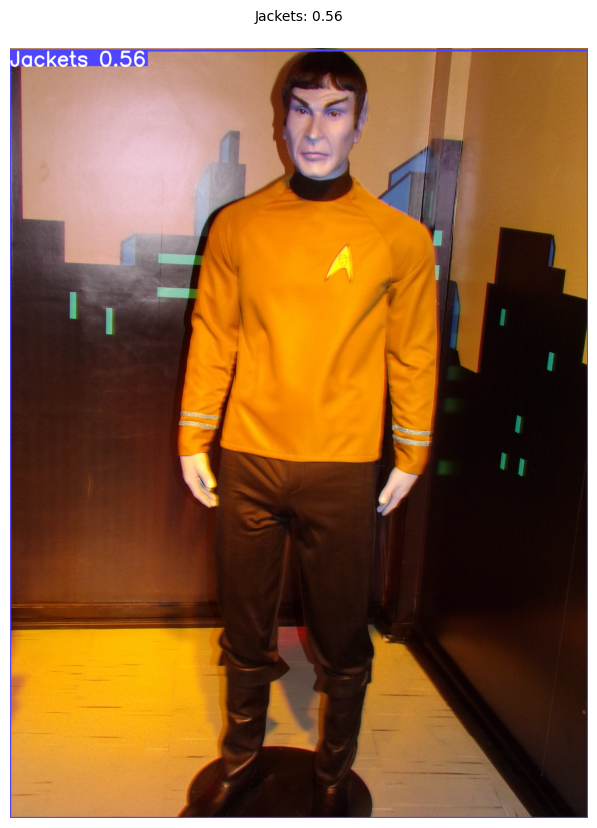

In [12]:
import matplotlib.pyplot as plt

# Get the annotated image
annotated_image = results[0].plot()

# Extract class names and confidence scores
detections = results[0].boxes.data.cpu().numpy()  # Get bounding boxes data
class_names = model.names  # Class names from the model

# Prepare subtitles
subtitles = []
for detection in detections:
    class_id, confidence = int(detection[-1]), detection[-2]
    class_name = class_names[class_id]
    subtitles.append(f"{class_name}: {confidence:.2f}")

# Display the image with subtitles
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis('off')  # Hide axes
plt.title("\n".join(subtitles), fontsize=10, loc='center', pad=20)  # Add subtitles
plt.show()
